In [56]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


Explore the credit data

Begin by looking at the data set cr_loan. In this data set, loan_status shows whether the loan is currently in default with 1 being default and 0 being non-default.

You have more columns within the data, and many could have a relationship with the values in loan_status. You need to explore the data and these relationships more with further analysis to understand the impact of the data on credit loan defaults.

Checking the structure of the data as well as seeing a snapshot helps us better understand what's inside the set. Similarly, visualizations provide a high level view of the data in addition to important trends and patterns.

In [2]:
cr_loan = pd.read_csv('cr_loan2.csv')
cr_loan

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [3]:
cr_loan.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

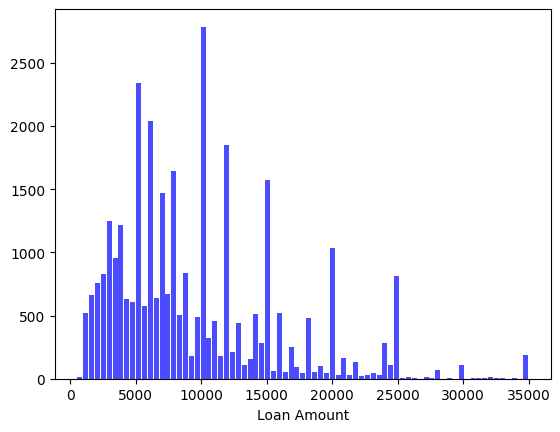

(array([1.100e+01, 5.180e+02, 6.660e+02, 7.600e+02, 8.250e+02, 1.250e+03,
        9.560e+02, 1.220e+03, 6.310e+02, 6.090e+02, 2.339e+03, 5.790e+02,
        2.037e+03, 6.350e+02, 1.473e+03, 6.700e+02, 1.643e+03, 5.020e+02,
        8.380e+02, 1.770e+02, 4.900e+02, 2.785e+03, 3.240e+02, 4.590e+02,
        1.780e+02, 1.850e+03, 2.150e+02, 4.380e+02, 1.080e+02, 1.540e+02,
        5.160e+02, 2.830e+02, 1.569e+03, 6.400e+01, 5.190e+02, 5.300e+01,
        2.510e+02, 9.000e+01, 4.300e+01, 4.790e+02, 5.300e+01, 1.040e+02,
        4.700e+01, 1.036e+03, 3.100e+01, 1.630e+02, 2.800e+01, 1.360e+02,
        1.800e+01, 2.900e+01, 4.700e+01, 2.900e+01, 2.830e+02, 1.070e+02,
        8.120e+02, 6.000e+00, 1.700e+01, 2.000e+00, 1.000e+00, 1.200e+01,
        8.000e+00, 6.800e+01, 0.000e+00, 7.000e+00, 1.000e+00, 1.090e+02,
        0.000e+00, 2.000e+00, 5.000e+00, 2.000e+00, 1.000e+01, 2.000e+00,
        6.000e+00, 1.000e+00, 6.000e+00, 0.000e+00, 1.860e+02]),
 array([  500.        ,   948.05194805,  1396.1

In [4]:
# Look at the distribution of loan amounts with a histogram
n, bins, patches = plt.hist(x=cr_loan['loan_amnt'], bins='auto', color='blue',alpha=0.7, rwidth=0.85)
plt.xlabel("Loan Amount")
plt.show()

n, bins, patches

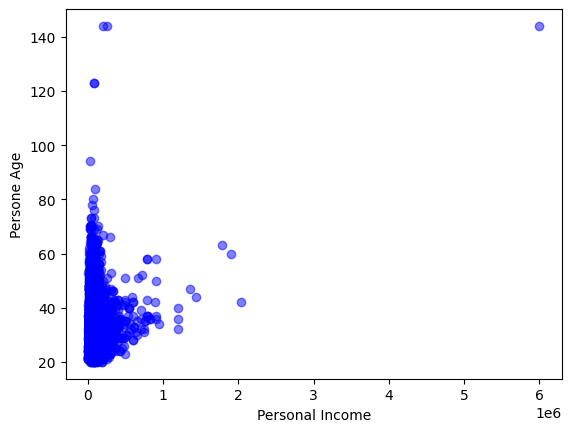

In [5]:
# Plot a scatter plot of income against age
plt.scatter(cr_loan['person_income'], cr_loan['person_age'],c='blue', alpha=0.5)
plt.xlabel('Personal Income')
plt.ylabel('Persone Age')
plt.show()

Crosstab and pivot tables

Often, financial data is viewed as a pivot table in spreadsheets like Excel.

With cross tables, you get a high level view of selected columns and even aggregation like a count or average. For most credit risk models, especially for probability of default, columns like person_emp_length and person_home_ownership are common to begin investigating.

You will be able to see how the values are populated throughout the data, and visualize them. For now, you need to check how loan_status is affected by factors like home ownership status, loan grade, and loan percentage of income.

In [6]:
# Create a cross table of the loan intent and loan status
pd.crosstab(cr_loan['loan_intent'], cr_loan['loan_status'], margins = True)

loan_status,0,1,All
loan_intent,,,
DEBTCONSOLIDATION,3722,1490,5212
EDUCATION,5342,1111,6453
HOMEIMPROVEMENT,2664,941,3605
MEDICAL,4450,1621,6071
PERSONAL,4423,1098,5521
VENTURE,4872,847,5719
All,25473,7108,32581


In [7]:
# Create a cross table of home ownership, loan status, and grade
pd.crosstab(cr_loan['person_home_ownership'],[cr_loan['loan_status'],cr_loan['loan_grade']])

loan_status               0                                 1             \
loan_grade                A     B     C    D    E   F  G    A     B    C   
person_home_ownership                                                      
MORTGAGE               5219  3729  1934  658  178  36  0  239   324  321   
OTHER                    23    29    11    9    2   0  0    3     5    6   
OWN                     860   770   464  264   26   7  0   66    34   31   
RENT                   3602  4222  2710  554  137  28  1  765  1338  981   

loan_status                               
loan_grade                D    E   F   G  
person_home_ownership                     
MORTGAGE                553  161  61  31  
OTHER                    11    6   2   0  
OWN                      18   31   8   5  
RENT                   1559  423  99  27

In [8]:
# Create a cross table of home ownership, loan status, and average percent income
pd.crosstab(cr_loan['person_home_ownership'], cr_loan['loan_status'],
              values=cr_loan['loan_percent_income'], aggfunc='mean')

loan_status,0,1
person_home_ownership,,
MORTGAGE,0.146504,0.184882
OTHER,0.143784,0.300000
OWN,0.180013,0.297358
RENT,0.144611,0.264859


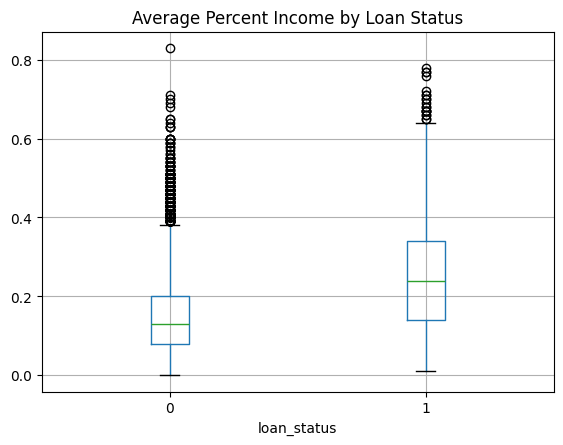

In [9]:
# Create a box plot of percentage income by loan status
cr_loan.boxplot(column = ['loan_percent_income'], by = 'loan_status')
plt.title('Average Percent Income by Loan Status')
plt.suptitle('')
plt.show()

# It looks like the average percentage of income for defaults is higher. This could indicate those recipients have a debt-to-income ratio that's already too high.

Finding outliers with cross tables

Now you need to find and remove outliers you suspect might be in the data. For this exercise, you can use cross tables and aggregate functions.

Have a look at the person_emp_length column. You've used the aggfunc = 'mean' argument to see the average of a numeric column before, but to detect outliers you can use other functions like min and max.

It may not be possible for a person to have an employment length of less than 0 or greater than 60. You can use cross tables to check the data and see if there are any instances of this!

In [10]:
# Create the cross table for loan status, home ownership, and the max employment length
pd.crosstab(cr_loan['loan_status'],cr_loan['person_home_ownership'],
                  values=cr_loan['person_emp_length'], aggfunc='max')

person_home_ownership,MORTGAGE,OTHER,OWN,RENT
loan_status,,,,
0,123.0,24.0,31.0,41.0
1,34.0,11.0,17.0,123.0


In [11]:
# Create an array of indices where employment length is greater than 60
indices = cr_loan[cr_loan['person_emp_length'] > 60].index

print(cr_loan.shape)

# Drop the records from the data based on the indices and create a new dataframe
cr_loan.drop(indices, inplace=True)

print(cr_loan.shape)

(32581, 12)
(32579, 12)


In [12]:
# Create an array of indices where employment length is greater than 60
indices = cr_loan[cr_loan['person_emp_length'] > 60].index

print(cr_loan.shape)

# Drop the records from the data based on the indices and create a new dataframe
cr_loan.drop(indices, inplace=True)

print(cr_loan.shape)

(32579, 12)
(32579, 12)


In [13]:
# Create the cross table from earlier and include minimum employment length
pd.crosstab(cr_loan['loan_status'],cr_loan['person_home_ownership'],
            values=cr_loan['person_emp_length'], aggfunc=['min','max'])

min                      max                  
person_home_ownership MORTGAGE OTHER  OWN RENT MORTGAGE OTHER   OWN  RENT
loan_status                                                              
0                          0.0   0.0  0.0  0.0     38.0  24.0  31.0  41.0
1                          0.0   0.0  0.0  0.0     34.0  11.0  17.0  27.0

Visualizing credit outliers

You discovered outliers in person_emp_length where values greater than 60 were far above the norm. person_age is another column in which a person can use a common sense approach to say it is very unlikely that a person applying for a loan will be over 100 years old.

Visualizing the data here can be another easy way to detect outliers. You can use other numeric columns like loan_amnt and loan_int_rate to create plots with person_age to search for outliers.

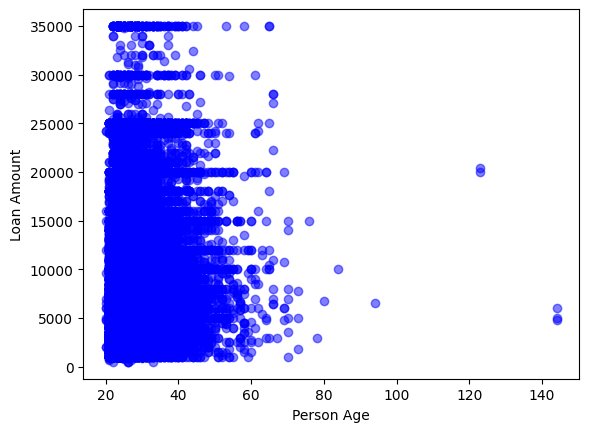

In [14]:
# Create the scatter plot for age and amount
plt.scatter(cr_loan['person_age'], cr_loan['loan_amnt'], c='blue', alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()

In [15]:
# Create an array of indices where person age > 120
indices = cr_loan[cr_loan['person_age'] > 120].index

print(cr_loan.shape)

# Drop the records from the data based on the indices and create a new dataframe
cr_loan.drop(indices, inplace=True)

print(cr_loan.shape)

(32579, 12)
(32574, 12)


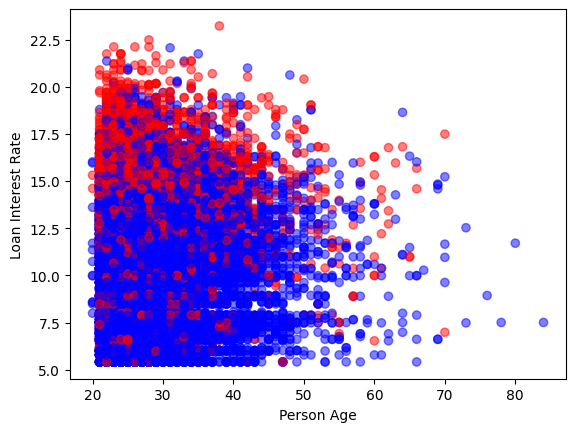

In [16]:
# Use Pandas to drop the record from the data frame and create a new one
cr_loan.drop(cr_loan[cr_loan['person_age'] > 100].index, inplace=True)

# Create a scatter plot of age and interest rate
colors = ["blue","red"]
plt.scatter(cr_loan['person_age'], cr_loan['loan_int_rate'],
            c = cr_loan['loan_status'],
            cmap = matplotlib.colors.ListedColormap(colors),
            alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Interest Rate")
plt.show()

# we have loan_status as a label for colors. This shows a different color depending on the class. 
# In this case, it's loan default and non-default, and it looks like there are more defaults with high interest rates.

Replacing missing credit data

Now, you should check for missing data. If you find missing data within loan_status, you would not be able to use the data for predicting probability of default because you wouldn't know if the loan was a default or not. Missing data within person_emp_length would not be as damaging, but would still cause training errors.

So, check for missing data in the person_emp_length column and replace any missing values with the median.

In [17]:
cr_loan

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [18]:
# Print a null value column array
cr_loan.columns[cr_loan.isnull().any()]

Index(['person_emp_length', 'loan_int_rate'], dtype='object')

In [19]:
# Print all rows with nulls for employment length
cr_loan[cr_loan['person_emp_length'].isnull()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32285,38,12000,OWN,NaN,EDUCATION,A,4800,7.29,1,0.40,N,12
32328,51,18408,RENT,NaN,PERSONAL,C,1000,14.65,1,0.05,Y,20
32360,70,39996,RENT,NaN,MEDICAL,C,3600,15.23,0,0.09,Y,19
32453,56,32400,RENT,NaN,MEDICAL,A,8575,7.51,0,0.26,N,18


In [20]:
# Impute the null values with the median value for all employment lengths
cr_loan['person_emp_length'].fillna((cr_loan['person_emp_length'].median()), inplace=True)

cr_loan[cr_loan['person_emp_length'].isnull()]

C:\Users\Alienware\AppData\Local\Temp\ipykernel_22424\18078800.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cr_loan['person_emp_length'].fillna((cr_loan['person_emp_length'].median()), inplace=True)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


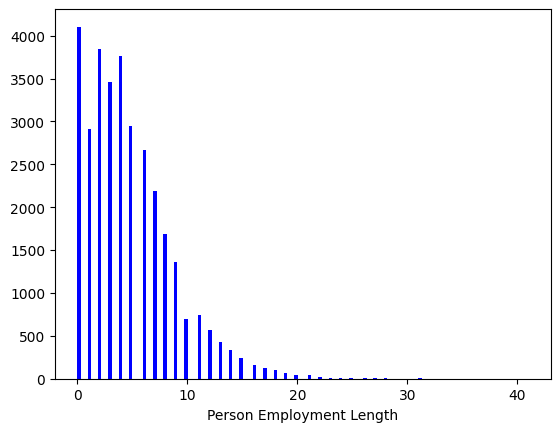

In [21]:
# Create a histogram of employment length
n, bins, patches = plt.hist(cr_loan['person_emp_length'], bins='auto', color='blue')
plt.xlabel("Person Employment Length")
plt.show()

Removing missing data

You replaced missing data in person_emp_length, but in the previous exercise you saw that loan_int_rate has missing data as well.

Similar to having missing data within loan_status, having missing data within loan_int_rate will make predictions difficult.

Because interest rates are set by your company, having missing data in this column is very strange. It's possible that data ingestion issues created errors, but you cannot know for sure. For now, it's best to .drop() these records before moving forward.

In [22]:
# Print the number of nulls
cr_loan['loan_int_rate'].isnull().sum()

3115

In [23]:
# Store the array on indices
indices = cr_loan[cr_loan['loan_int_rate'].isnull()].index

# Save the new data without missing data
cr_loan.drop(indices, inplace=True)

cr_loan['loan_int_rate'].isnull().sum()

0

In [25]:
# Count the number of records for each unique value
cr_loan['person_home_ownership'].value_counts(dropna=False)

person_home_ownership
RENT        14890
MORTGAGE    12119
OWN          2356
OTHER          94
Name: count, dtype: int64

Logistic regression basics

You've now cleaned up the data and created the new data set cr_loan.

Think back to the final scatter plot which showed more defaults with high loan_int_rate. Interest rates are easy to understand, but what how useful are they for predicting the probability of default?

Since you haven't tried predicting the probability of default yet, test out creating and training a logistic regression model with just loan_int_rate. Also check the model's internal parameters, which are like settings, to see the structure of the model with this one column.

In [31]:
# Create the X and y data sets
X = cr_loan[['loan_int_rate']]
y = cr_loan['loan_status']

In [33]:
# Create and fit a logistic regression model
clf_logistic_single = LogisticRegression()
clf_logistic_single.fit(X, y)

LogisticRegression()

In [35]:
# Print the parameters of the model
print(clf_logistic_single.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [45]:
# Print the coefficient of the model
print(clf_logistic_single.coef_)
# The change in log-odds of loan status (e.g., insolvency) for a unit increase in loan interest rate

# Print the exponential of the coefficient
print(np.exp(clf_logistic_single.coef_))
# The odds ratio for a unit increase in loan interest rate
# As the odds ratio is greater than one, it means that the probability of insolvency increases with a higher interest rate

# Print the intercept of the model
print(clf_logistic_single.intercept_)
# The log-odds of loan status (e.g., insolvency) when the loan interest rate is zero

# Print the exponential of the intercept
print(np.exp(clf_logistic_single.intercept_))
# The baseline odds of loan status when the loan interest rate is zero
# As the baseline odds are lower than one, it means that the probability of insolvency is low when interest rates are zero


[[0.27144136]]
[[1.31185394]]
[-4.45784525]
[0.0115873]


Multivariate logistic regression

Generally, you won't use only loan_int_rate to predict the probability of default. You will want to use all the data you have to make predictions.

With this in mind, try training a new model with different columns, called features, from the cr_loan_clean data. Will this model differ from the first one? For this, you can easily check the .intercept_ of the logistic regression. Remember that this is the y-intercept of the function and the overall log-odds of non-default.

In [48]:
# Create X data for the model
X_multi = cr_loan[['loan_int_rate','person_emp_length']]

# Create a set of y data for training
y = cr_loan['loan_status']

# Create and train a new logistic regression
clf_logistic_multi = LogisticRegression(solver='lbfgs').fit(X_multi, y)

# Print the intercept of the model
print(clf_logistic_multi.intercept_, np.exp(clf_logistic_multi.intercept_)) # still very low, but slightly higher, baseline insolvency probability

[-4.21644963] [0.01475092]


Creating training and test sets

You've just trained LogisticRegression() models on different columns.

You know that the data should be separated into training and test sets. test_train_split() is used to create both at the same time. The training set is used to make predictions, while the test set is used for evaluation. Without evaluating the model, you have no way to tell how well it will perform on new loan data.

In [58]:
# Create the X and y data sets
X = cr_loan[['loan_int_rate','person_emp_length','person_income']]
y = cr_loan['loan_status']

# Use test_train_split to create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=333)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf_logistic = LogisticRegression(solver='lbfgs', max_iter=1000).fit(X_train_scaled, y_train)

# Print the models coefficients
print(clf_logistic.coef_)
print(np.exp(clf_logistic.coef_))

[[ 0.9313831  -0.06717843 -1.1050427 ]]
[[2.53801709 0.93502835 0.33119674]]
